# Federal Contract Awards - Exploratory Data Analysis

Analysis of federal contract awards fetched from USAspending API

**Data Period**: September 22-29, 2024  
**Criteria**: Award types A/B/C/D, Amount ≥ $900,000

## Setup

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


In [17]:
# Load normalized awards data
data_path = Path('../data/awards/awards_normalized_2026-01-07_13-43-15.json')

with open(data_path, 'r') as f:
    awards_data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(awards_data)

print(f"Loaded {len(df):,} awards")
print(f"Data shape: {df.shape}")

Loaded 10,000 awards
Data shape: (10000, 18)


In [18]:
# First few records
df.head()

,award_id,award_type,award_amount,award_date,start_date,end_date,awarding_agency,awarding_sub_agency,funding_agency,recipient_name,recipient_uei,recipient_business_categories,award_description,naics_code,psc_code,place_of_performance_state,ingested_at,source_url
0,DEAC3243AL00036,Unknown,35295675219.18,,1978-09-30,2006-05-31,Department of Energy,Department of Energy,Department of Energy,"REGENTS OF THE UNIVERSITY OF CALIFORNIA, THE",LWKAEZ2JLMM9,[],M&O OF LANL BR OF U OF CA,541710,None,NM,2026-01-07T18:43:15.184Z,https://www.usaspending.gov/award/295476983
1,N0001902C3002,Unknown,34173959111.96,,2001-10-26,2022-12-16,Department of Defense,Defense Contract Management Agency,Department of Defense,LOCKHEED MARTIN CORPORATION,G4KDGE4JFFK7,[],200204!008532!1700!AF600 !NAVAL AIR SYSTEMS CO...,336411,None,TX,2026-01-07T18:43:15.184Z,https://www.usaspending.gov/award/309493328
2,FA862511C6600,Unknown,29485980901.28,,2011-02-24,2027-07-31,Department of Defense,Department of the Air Force,Department of Defense,THE BOEING COMPANY,WZWRLY4G3PL8,[],KC-X MODERNIZATION PROGRAM,336411,None,WA,2026-01-07T18:43:15.184Z,https://www.usaspending.gov/award/298557808
3,DEAC0584OR21400,Unknown,20646113720.09,,1984-04-30,2025-08-30,Department of Energy,Department of Energy,Department of Energy,"LOCKHEED MARTIN SERVICES, LLC",G9CZJMSCRR28,[],MANAGEMENT AND OPERATION OF Y-12 PLANT AND OTH...,561210,None,TN,2026-01-07T18:43:15.184Z,https://www.usaspending.gov/award/295476177
4,HT940211C0003,Unknown,20451127096.53,,2011-03-03,2019-03-27,Department of Defense,Defense Health Agency,Department of Defense,HUMANA GOVERNMENT BUSINESS INC,ZE6ZM6NKSV43,[],T3 MANAGED CARE SUPPORT CONTRACT FOR SOUTH REGION,524114,None,KY,2026-01-07T18:43:15.184Z,https://www.usaspending.gov/award/307885549


In [19]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   award_id                       10000 non-null  object 
 1   award_type                     10000 non-null  object 
 2   award_amount                   10000 non-null  float64
 3   award_date                     10000 non-null  object 
 4   start_date                     10000 non-null  object 
 5   end_date                       10000 non-null  object 
 6   awarding_agency                10000 non-null  object 
 7   awarding_sub_agency            10000 non-null  object 
 8   funding_agency                 10000 non-null  object 
 9   recipient_name                 10000 non-null  object 
 10  recipient_uei                  10000 non-null  object 
 11  recipient_business_categories  10000 non-null  object 
 12  award_description              10000 non-null  

In [20]:
# Overall statistics
total_value = df['award_amount'].sum()
mean_value = df['award_amount'].mean()
median_value = df['award_amount'].median()

print("=== Award Value Statistics ===")
print(f"Total Value: ${total_value:,.2f} ({total_value/1e9:.2f}B)")
print(f"Mean Value: ${mean_value:,.2f}")
print(f"Median Value: ${median_value:,.2f}")
print(f"Min Value: ${df['award_amount'].min():,.2f}")
print(f"Max Value: ${df['award_amount'].max():,.2f}")
print(f"\nStd Dev: ${df['award_amount'].std():,.2f}")

=== Award Value Statistics ===
Total Value: $1,165,431,921,821.32 (1165.43B)
Mean Value: $116,543,192.18
Median Value: $25,750,386.52
Min Value: $11,346,750.84
Max Value: $35,295,675,219.18

Std Dev: $846,901,191.78


## Top Recipients Analysis

In [ ]:
# Top 20 recipients by total award value
top_recipients = df.groupby('recipient_name')['award_amount'].agg(['sum', 'count']).sort_values('sum', ascending=False).head(20)
top_recipients.columns = ['Total Award Value', 'Number of Awards']
top_recipients['Avg Award Value'] = top_recipients['Total Award Value'] / top_recipients['Number of Awards']

print("Top 20 Recipients by Total Award Value:")
top_recipients

Top 20 Recipients by Total Award Value:


,Total Award Value,Number of Awards,Avg Award Value
recipient_name,,,
LOCKHEED MARTIN CORPORATION,125467545055.26,361,347555526.47
THE BOEING COMPANY,105786938895.29,264,400708101.88
RAYTHEON COMPANY,49637474895.53,253,196195552.95
"REGENTS OF THE UNIVERSITY OF CALIFORNIA, THE",35295675219.18,1,35295675219.18
LOCKHEED MARTIN CORP,34914028063.86,56,623464786.85
NORTHROP GRUMMAN SYSTEMS CORPORATION,31382400352.73,184,170556523.66
"KBR SERVICES, LLC",27972306701.01,25,1118892268.04
"LOCKHEED MARTIN SERVICES, LLC",20786017553.70,2,10393008776.85
HUMANA GOVERNMENT BUSINESS INC,20451127096.53,1,20451127096.53


## Geographic Analysis

In [ ]:
# Awards by state
state_stats = df.groupby('place_of_performance_state').agg({
    'award_amount': ['sum', 'count', 'mean']
}).sort_values(('award_amount', 'sum'), ascending=False)

state_stats.columns = ['Total Value', 'Count', 'Average Value']
state_stats['% of Total'] = (state_stats['Total Value'] / df['award_amount'].sum() * 100)

print(f"Total states/territories: {len(state_stats)}")
print("\nTop 15 States by Total Award Value:")
state_stats.head(15)

Total states/territories: 55

Top 15 States by Total Award Value:


,Total Value,Count,Average Value,% of Total
place_of_performance_state,,,,
TX,155767846644.12,612,254522625.24,13.37
CA,116685984936.06,730,159843814.98,10.01
VA,111883126962.90,1732,64597648.36,9.60
WA,50243785024.80,102,492586127.69,4.31
MD,48927803630.33,792,61777529.84,4.20
AZ,47105636561.54,206,228668138.65,4.04
CT,42068462424.75,110,382440567.50,3.61
DC,41417834384.19,773,53580639.57,3.55
NM,38800337043.40,71,546483620.33,3.33


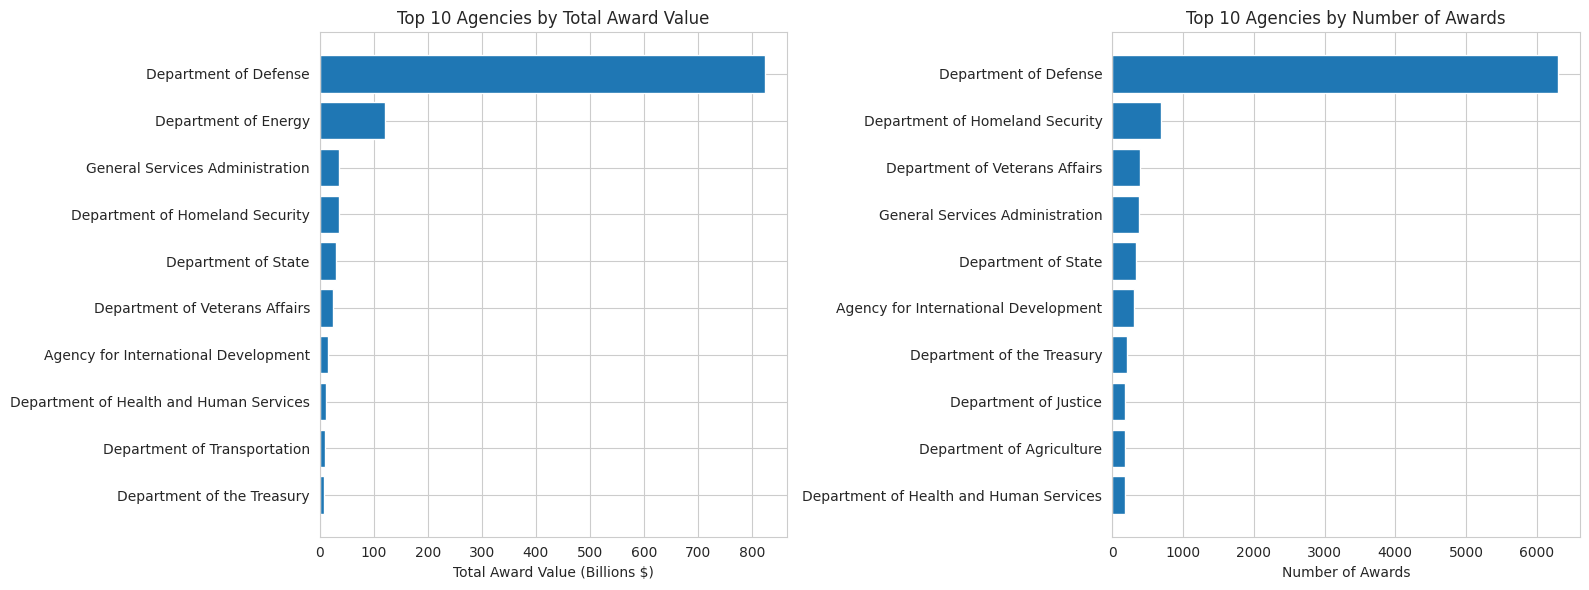

In [ ]:
# Visualize agency distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top agencies by value
top_agencies = agency_stats.head(10)
axes[0].barh(range(len(top_agencies)), top_agencies['Total Value'] / 1e9)
axes[0].set_yticks(range(len(top_agencies)))
axes[0].set_yticklabels(top_agencies.index)
axes[0].set_xlabel('Total Award Value (Billions $)')
axes[0].set_title('Top 10 Agencies by Total Award Value')
axes[0].invert_yaxis()

# Top agencies by count
top_count = agency_stats.sort_values('Count', ascending=False).head(10)
axes[1].barh(range(len(top_count)), top_count['Count'])
axes[1].set_yticks(range(len(top_count)))
axes[1].set_yticklabels(top_count.index)
axes[1].set_xlabel('Number of Awards')
axes[1].set_title('Top 10 Agencies by Number of Awards')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## Agency Analysis

In [ ]:
# Awards by agency
agency_stats = df.groupby('awarding_agency').agg({
    'award_amount': ['sum', 'count', 'mean']
}).sort_values(('award_amount', 'sum'), ascending=False)

agency_stats.columns = ['Total Value', 'Count', 'Average Value']
agency_stats['% of Total Value'] = (agency_stats['Total Value'] / df['award_amount'].sum() * 100)

print("Top Agencies by Total Award Value:")
agency_stats.head(15)

Top Agencies by Total Award Value:


,Total Value,Count,Average Value,% of Total Value
awarding_agency,,,,
Department of Defense,824412740382.98,6294,130983911.72,70.74
Department of Energy,121590997756.04,127,957409431.15,10.43
General Services Administration,36630863065.46,385,95145098.87,3.14
Department of Homeland Security,34991306971.33,685,51082199.96,3.00
Department of State,30851937954.39,332,92927523.96,2.65
Department of Veterans Affairs,25700023333.66,395,65063350.21,2.21
Agency for International Development,15186577794.52,304,49955848.01,1.30
Department of Health and Human Services,11127556396.90,176,63224752.26,0.95
Department of Transportation,10903553472.58,146,74681873.10,0.94


In [ ]:
# Visualize top 15 recipients
plt.figure(figsize=(12, 8))
top_15 = top_recipients.head(15)
plt.barh(range(len(top_15)), top_15['Total Award Value'] / 1e9)
plt.yticks(range(len(top_15)), top_15.index)
plt.xlabel('Total Award Value (Billions $)')
plt.title('Top 15 Recipients by Total Award Value')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

NameError: name 'top_recipients' is not defined

<Figure size 1200x800 with 0 Axes>